In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd

# Fix the file path by either:
# 1. Using raw string (r prefix)
df = pd.read_csv(r"C:\Users\Anurag\OneDrive\Documents\diabetes.csv")

# OR
# 2. Using forward slashes instead of backslashes
# df = pd.read_csv("C:/Users/Anurag/OneDrive/Documents/diabetes.csv")

# OR
# 3. Escaping each backslash with another backslash
# df = pd.read_csv("C:\\Users\\Anurag\\OneDrive\\Documents\\diabetes.csv")

print(df.head())
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [13]:
# 1. Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import joblib   # to save models
%matplotlib inline
sns.set(style="whitegrid")


In [15]:
# 2. Check working directory and file
print("Working dir:", os.getcwd())
print("Files here:", os.listdir()[:20])  # first 20 files

# Load data
# Fix: Use raw string (r prefix) or double backslashes or forward slashes for the path
df = pd.read_csv(r"C:\Users\Anurag\OneDrive\Documents\diabetes.csv")   # Using raw string
# Alternative fixes:
# df = pd.read_csv("C:\\Users\\Anurag\\OneDrive\\Documents\\diabetes.csv")  # Double backslashes
# df = pd.read_csv("C:/Users/Anurag/OneDrive/Documents/diabetes.csv")  # Forward slashes

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Working dir: C:\Users\sukla
Files here: ['.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.eclipse', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.lesshst', '.m2', '.matplotlib', '.ms-ad', '.node_repl_history', '.p2', '.th-client', '.vscode', '7z2409-x64.exe']
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# 2. Check working directory and file
print("Working dir:", os.getcwd())
print("Files here:", os.listdir()[:20])  # first 20 files

# Load data
# Fix: Use raw string (r prefix) or double backslashes or forward slashes for the path
df = pd.read_csv(r"C:\Users\Anurag\OneDrive\Documents\diabetes.csv")   # Using raw string
# Alternative fixes:
# df = pd.read_csv("C:\\Users\\Anurag\\OneDrive\\Documents\\diabetes.csv")  # Double backslashes
# df = pd.read_csv("C:/Users/Anurag/OneDrive/Documents/diabetes.csv")  # Forward slashes

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Working dir: C:\Users\sukla
Files here: ['.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.eclipse', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.lesshst', '.m2', '.matplotlib', '.ms-ad', '.node_repl_history', '.p2', '.th-client', '.vscode', '7z2409-x64.exe']
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
# Basic info
print("Rows, cols:", df.shape)
print("\nColumn names:", df.columns.tolist())

# First 5 rows
display(df.head())

# Count of outcomes
counts = df['Outcome'].value_counts().sort_index()
print("\nOutcome counts (0 = no diabetes, 1 = diabetes):\n", counts)
print("\nPercentage:\n", (counts / len(df) * 100).round(2))

Rows, cols: (768, 9)

Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Outcome counts (0 = no diabetes, 1 = diabetes):
 Outcome
0    500
1    268
Name: count, dtype: int64

Percentage:
 Outcome
0    65.1
1    34.9
Name: count, dtype: float64


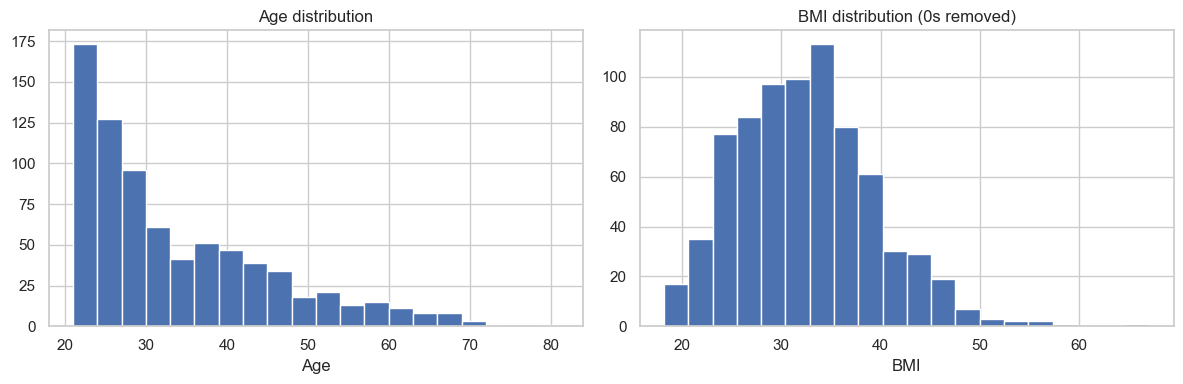

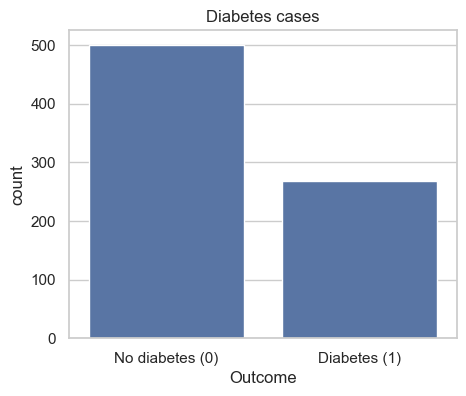

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df['Age'].dropna(), bins=20)
plt.title('Age distribution')
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.hist(df['BMI'].replace(0, np.nan).dropna(), bins=20)  # ignore 0s (invalid)
plt.title('BMI distribution (0s removed)')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

# Bar chart of diabetes cases
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df)
plt.xticks([0,1], ['No diabetes (0)', 'Diabetes (1)'])
plt.title('Diabetes cases')
plt.show()

In [19]:
missing_zero_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [20]:
# Features / target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Convert zeros to NaN for specified columns
X[missing_zero_cols] = X[missing_zero_cols].replace(0, np.nan)

# Train/test split (stratify keeps label distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Pipeline: impute (median) -> scale -> logistic regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   # fit on train only
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])

pipeline.fit(X_train, y_train)

# Predictions + accuracy
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

# Optional: save pipeline
joblib.dump(pipeline, 'logreg_pima_pipeline.joblib')


Test accuracy: 0.7446


['logreg_pima_pipeline.joblib']

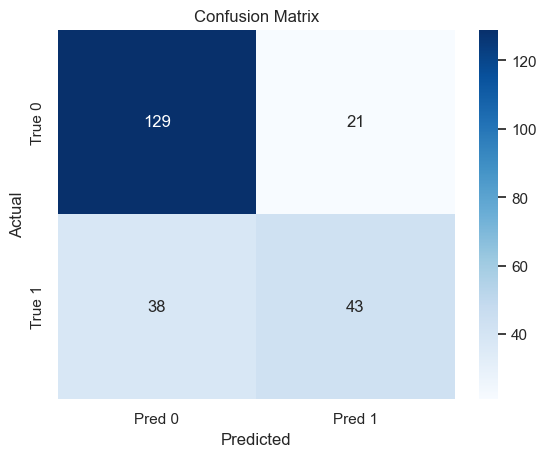


Classification report:
               precision    recall  f1-score   support

           0     0.7725    0.8600    0.8139       150
           1     0.6719    0.5309    0.5931        81

    accuracy                         0.7446       231
   macro avg     0.7222    0.6954    0.7035       231
weighted avg     0.7372    0.7446    0.7365       231



In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))


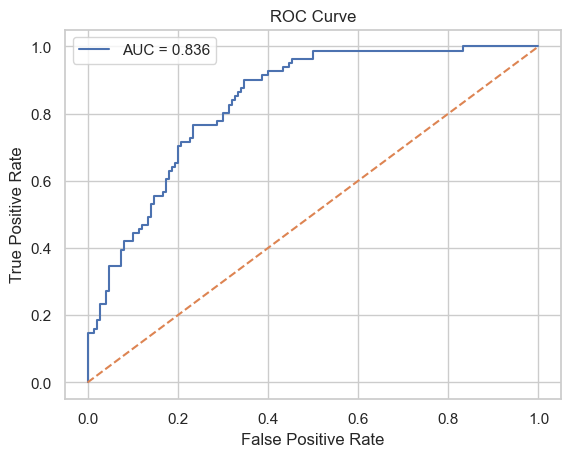

In [22]:
y_proba = pipeline.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()